In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np


In [2]:
# Set seed for reproducibility
import random
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [3]:
data=pd.read_csv("boston_housing.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
X = data.drop(columns=["MEDV"])  # Assuming 'MEDV' is the target column
y = data["MEDV"].values

In [8]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Build the Deep Neural Network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13,), name='input-layer'),  # Input layer
    
    # First hidden layer with 128 units and ReLU activation
    tf.keras.layers.Dense(128, activation='relu', name='hidden-layer-1'),
    
    # Batch Normalization to stabilize training
    tf.keras.layers.BatchNormalization(name='batch-normalization-1'),
    
    # Dropout layer to prevent overfitting
    tf.keras.layers.Dropout(0.2, name='dropout-layer-1'),
    
    # Second hidden layer with 64 units and ReLU activation
    tf.keras.layers.Dense(64, activation='relu', name='hidden-layer-2'),
    
    # Batch Normalization for the second hidden layer
    tf.keras.layers.BatchNormalization(name='batch-normalization-2'),
    
    # Dropout layer to prevent overfitting
    tf.keras.layers.Dropout(0.2, name='dropout-layer-2'),
    
    # Output layer with 1 unit (no activation)
    tf.keras.layers.Dense(1, name='output-layer')
])

In [11]:
# Compile the model with Adam optimizer and MSE loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 572.4227 - val_loss: 526.4896
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 536.5261 - val_loss: 518.1606
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 526.6173 - val_loss: 509.1661
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 514.1615 - val_loss: 499.9727
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 503.0935 - val_loss: 489.6553
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 494.0581 - val_loss: 479.0054
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 482.4510 - val_loss: 468.5023
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 472.0633 - val_loss: 454.1937
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 459.5397 - val_loss: 442.6596
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 446.2734 - val_loss: 429.3498
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 433.8377 - val_loss: 414.0482
Epoch 12/100
13/13

In [13]:
# Predict the prices using the trained model
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden-layer-1 (Dense)               │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch-normalization-1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout-layer-1 (Dropout)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden-layer-2 (Dense)               │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch-normalization-2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout-layer-2 (Dropout)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output-layer (Dense)                 │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,877 (124.52 KB)

 Trainable params: 10,497 (41.00 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 20,996 (82.02 KB)

In [15]:
# Performance Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [16]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 9.29559063566574
Root Mean Squared Error (RMSE): 3.0488671069211493
R² Score: 0.8732427234069782
Mean Absolute Error (MAE): 2.070562630073697


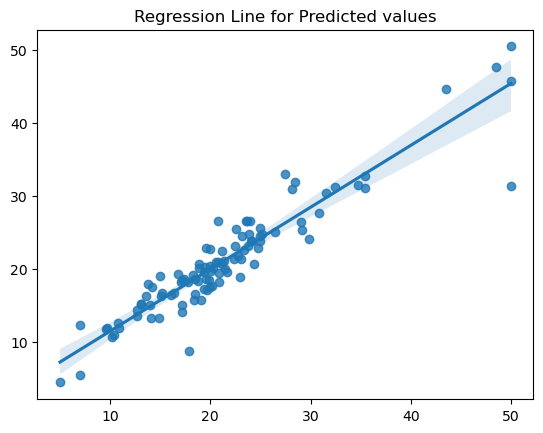

In [17]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()

In [18]:
#Comparison with traditional approaches
#First let's try with a simple algorithm, the Linear Regression:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

In [20]:
print('Mean squared error on test data: ', mse_lr)
print('Mean absolute error on test data: ', mae_lr)
r2 = r2_score(y_test, y_pred_lr)
print('R2: ',r2)
rmse = np.sqrt(mse_lr) 
print('RMSE: ',rmse)


Mean squared error on test data:  24.291119474973495
Mean absolute error on test data:  3.189091965887846
R2:  0.6687594935356322
RMSE:  4.928602182665334


In [21]:
import numpy as np

# Example new input data (e.g., 5 houses with 13 features each)
new_data = np.array([
    [0.1, 0.2, 7.2, 0.0, 0.0, 6.0, 15.0, 1.0, 5.0, 300.0, 10.0, 300.0, 15.0],
    [0.3, 0.4, 8.0, 0.1, 0.1, 5.5, 16.0, 2.0, 4.5, 320.0, 9.0, 310.0, 16.0],
    [0.05, 0.1, 6.5, 0.1, 0.0, 7.0, 14.0, 1.5, 5.2, 310.0, 11.0, 280.0, 14.0],
    [0.2, 0.3, 7.8, 0.0, 0.1, 6.5, 17.0, 1.8, 4.8, 290.0, 10.0, 305.0, 15.5],
    [0.1, 0.2, 7.0, 0.0, 0.2, 6.8, 16.5, 1.2, 5.0, 310.0, 10.5, 300.0, 15.0]
])

# Ensure the data is in the correct format and shape
# Make predictions
predictions = model.predict(new_data)

# Output the predictions
print("Predicted housing prices:", predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted housing prices: [[254.64363]
 [274.277  ]
 [310.8902 ]
 [217.6067 ]
 [274.80768]]


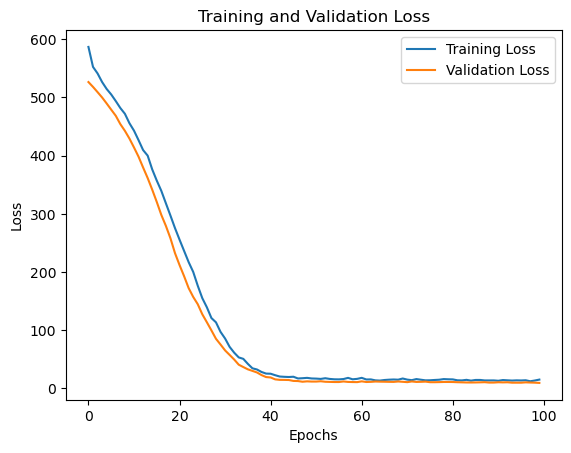

In [22]:
# Plotting training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

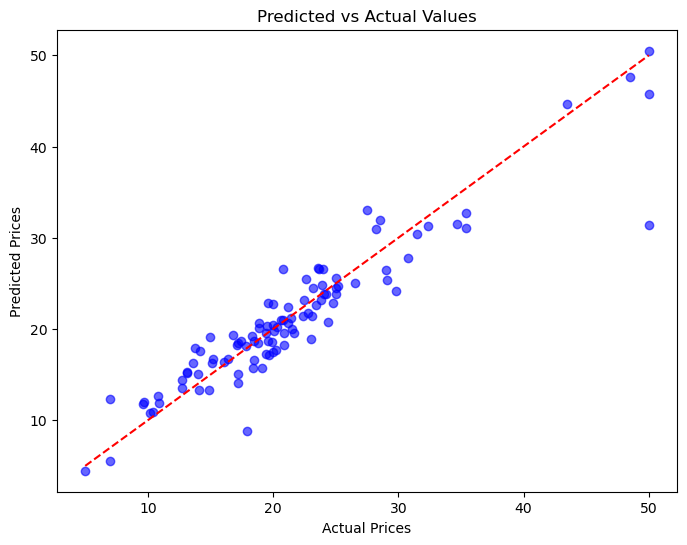

In [23]:
# Plotting predicted vs actual values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Ideal line
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_8132\1301630865.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.MEDV)


<Axes: xlabel='MEDV', ylabel='Density'>

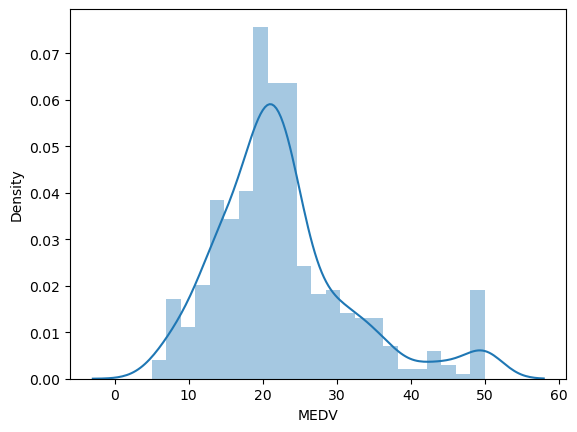

In [24]:
#checking the distribution of the target variable
import seaborn as sns
sns.distplot(data.MEDV)


In [27]:
#Epochs =100
# Batch size =32
#learning rate =0.001
""""Mean Squared Error (MSE): 9.29559063566574
Root Mean Squared Error (RMSE): 3.0488671069211493
R² Score: 0.8732427234069782
Mean Absolute Error (MAE): 2.070562630073697
"""
#learning rate =0.002
"""
Mean Squared Error (MSE): 9.816461917064453
Root Mean Squared Error (RMSE): 3.1331233485237147
R² Score: 0.8661399767743658
Mean Absolute Error (MAE): 2.0566994395910525
"""
#batch size= 64
#learning rate=0.001
"""
Mean Squared Error (MSE): 10.247657018519496
Root Mean Squared Error (RMSE): 3.2011961855718085
R² Score: 0.860260079640021
Mean Absolute Error (MAE): 2.06848109516443
"""
#learning rate =0.002
"""
Mean Squared Error (MSE): 9.885433616835902
Root Mean Squared Error (RMSE): 3.144110942195886
R² Score: 0.8651994593648021
Mean Absolute Error (MAE): 2.134207897560269
"""


    

'\nMean Squared Error (MSE): 9.885433616835902\nRoot Mean Squared Error (RMSE): 3.144110942195886\nR² Score: 0.8651994593648021\nMean Absolute Error (MAE): 2.134207897560269\n'

In [26]:
"""
Where Hyperparameter Tuning is Applied in the Model:
In the code I provided earlier, these hyperparameters are used in the following ways:

Learning Rate:

In the optimizer, you set the learning rate as 0.001. You can tune this value to see if a higher or lower learning rate yields better results.
python
Copy
Edit
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
Epochs:

You defined the number of epochs as 100, but you might experiment with more or fewer epochs to find the optimal training duration.
python
Copy
Edit
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
Batch Size:

The batch_size is set to 32. You could tune this by testing smaller or larger batch sizes to find the most efficient option.
python
Copy
Edit
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
Number of Layers and Units:

The number of hidden layers and the number of units in each layer (e.g., 128 in the first hidden layer, 64 in the second) are defined in the model architecture. You can adjust these values based on the performance.
python
Copy
Edit
model.add(Dense(128, activation='relu', name='hidden-layer-1'))  # First hidden layer with 128 units
model.add(Dense(64, activation='relu', name='hidden-layer-2'))   # Second hidden layer with 64 units
Dropout Rate:

Dropout is applied with a rate of 0.2. You can try tuning this value to reduce overfitting.
python
Copy
Edit
model.add(Dropout(0.2))  # Dropout layer with 20% dropout rate
"""

"\nWhere Hyperparameter Tuning is Applied in the Model:\nIn the code I provided earlier, these hyperparameters are used in the following ways:\n\nLearning Rate:\n\nIn the optimizer, you set the learning rate as 0.001. You can tune this value to see if a higher or lower learning rate yields better results.\npython\nCopy\nEdit\noptimizer=tf.keras.optimizers.Adam(learning_rate=0.001)\nEpochs:\n\nYou defined the number of epochs as 100, but you might experiment with more or fewer epochs to find the optimal training duration.\npython\nCopy\nEdit\nmodel.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))\nBatch Size:\n\nThe batch_size is set to 32. You could tune this by testing smaller or larger batch sizes to find the most efficient option.\npython\nCopy\nEdit\nmodel.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))\nNumber of Layers and Units:\n\nThe number of hidden layers and the number of units in each layer (e.g., 128 in 

In [25]:
""""MAE: Low (e.g., 1-5 for small datasets)
MSE: Low (e.g., close to 0)
RMSE: Low (e.g., close to 0, and it should be interpretable in the same units as the target variable)
R²: High (e.g., above 0.8 is usually considered good, 1 is perfect)"""

'"MAE: Low (e.g., 1-5 for small datasets)\nMSE: Low (e.g., close to 0)\nRMSE: Low (e.g., close to 0, and it should be interpretable in the same units as the target variable)\nR²: High (e.g., above 0.8 is usually considered good, 1 is perfect)'